# Explore here

In [17]:
import os
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()



True

In [4]:
# Ejercicio 3: VARIABLES DEL ENTORNO
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [7]:
#Ejercico 4: Inicializar la biblioteca Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [12]:
# Ejercicio 5: Realizar solicitudes a la API
top_artista = '06HL4z0CvFAxyc27GXpf02'
response = sp.artist_top_tracks(top_artista)
if response:
    tracks = response["tracks"]
    tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]


In [10]:
#Ejercicio 6: Transformar a Pandas DataFrame
df = pd.DataFrame(tracks)
Top_3 = df.head(3)
print(Top_3)

   duration_ms                           name  popularity
0     2.973767                   Cruel Summer          89
1     3.816083  Fortnight (feat. Post Malone)          84
2     3.992667                       cardigan          85


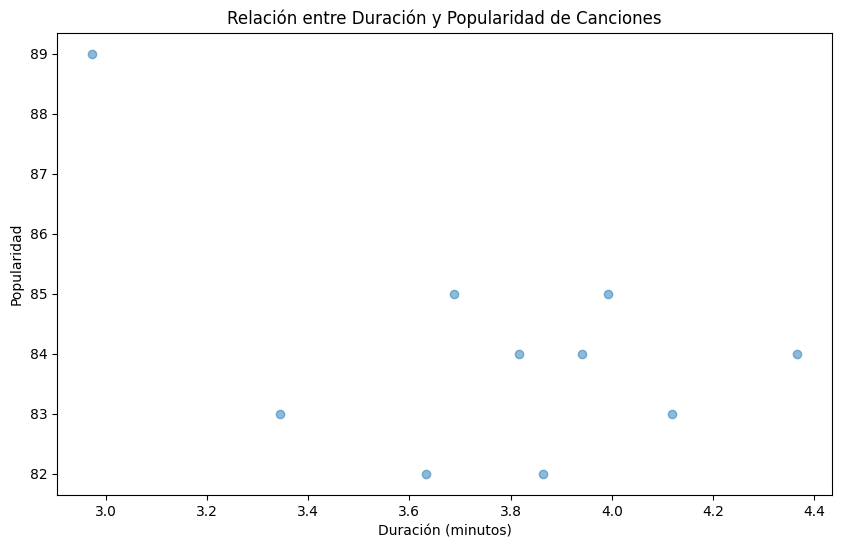

In [22]:
#Ejercicio 7: Analizar relación estadística

plt.figure(figsize=(10, 6))
plt.scatter(df['duration_ms'], df['popularity'], alpha=0.5)
plt.title('Relación entre Duración y Popularidad de Canciones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.show()

Podemos ver que la mayor parte de sus canciones más populares se reparten entre los 3.6 y los 4.2 minutos por canción. Observamos tambien algunas excepciones que se salen de ese rango como por ejemplo la más alejada que dura menos de 3 minutos pero tambien es la más popular.